# Adaptive Thresholding Testing

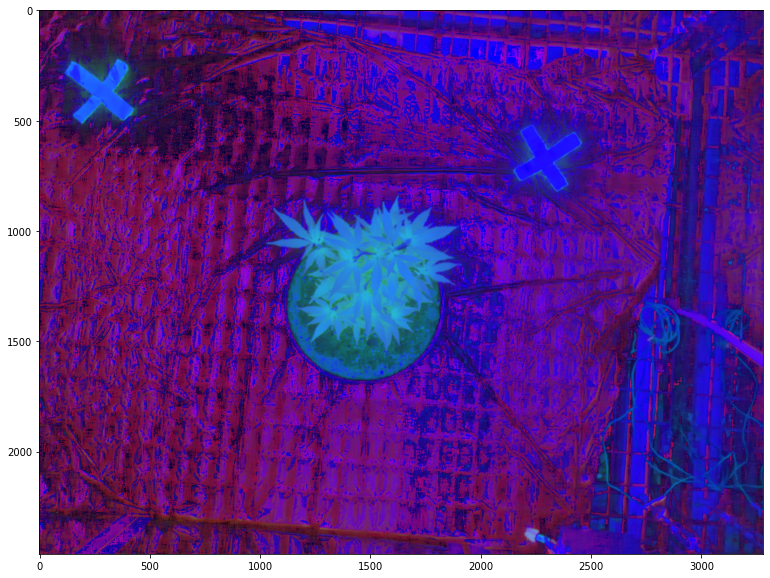

In [1]:
import os
import cv2 as cv
import numpy as np
from matplotlib import pyplot

%matplotlib inline
pyplot.rcParams['figure.figsize'] = [24, 10]

os.chdir("C:/Users/Admin/Downloads")
image = cv.cvtColor(cv.imread("./img3.png"), cv.COLOR_BGR2HSV)
pyplot.imshow(image)

## Filtering

Min = 25
Max = 75

Found through experimentation

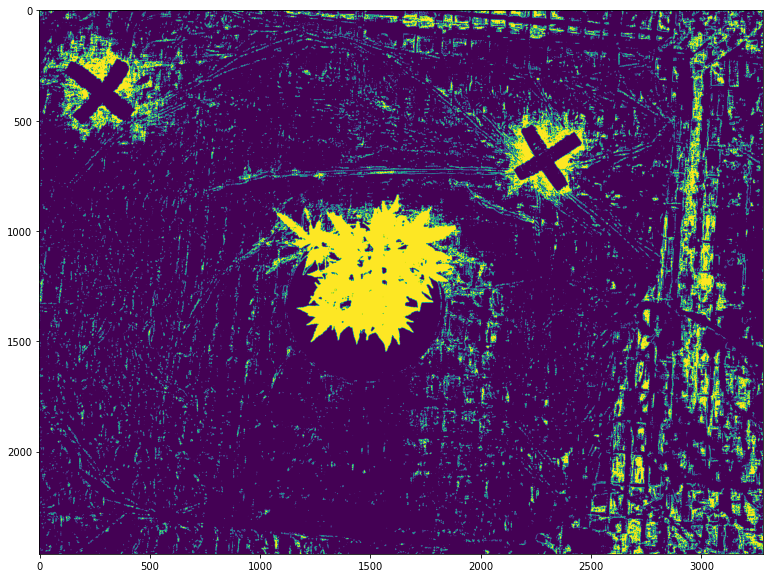

In [8]:
imageH = image[:, :, 0]
min = 35
max = 45
imageH = cv.inRange(imageH, min, max)/255
pyplot.imshow(imageH)

In [9]:
pixelCount = np.sum(imageH != 0)
print(pixelCount)

1039273


In [10]:
(_, elementLabels, elementStats, _) = cv.connectedComponentsWithStats(imageH, 8)
elementLabels = elementLabels[1:]
elementStats = elementStats[1:]
biggestElementLocation = np.where(elementStats[1:, 4] == max(elementStats[1:, 4]))[0][0] + 2
elementLabels[elementLabels != biggestElementLocation] = 0
interestingPixels = np.sum(elementLabels != 0)
pyplot.imshow(elementLabels)

error: OpenCV(4.5.2) C:\Users\runneradmin\AppData\Local\Temp\pip-req-build-ttbyx0jz\opencv\modules\imgproc\src\connectedcomponents.cpp:4315: error: (-215:Assertion failed) iDepth == CV_8U || iDepth == CV_8S in function 'cv::connectedComponents_sub1'
